# One-Class SVM

## Import Libraries

In [1]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
import sys, os

# Import Functions

In [2]:
sys.path.insert(0, '../../')
from src.functions import Data, Modeling, Evaluation

dt = Data()
mod = Modeling()
eval = Evaluation()

# Load Data

In [3]:
# Get data directory
data_dir = os.path.join(os.getcwd(), '../../data/processed')

# Load processed data
X_train, X_val, X_test, y_train, y_val, y_test, unlabeled_test = dt.load_data(data_dir)

In [4]:
# Save column names
X_val_df = X_val

# Convert pandas dataframes to numpy arrays for memory efficiency
X_train = X_train.values
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values

# Base Model

5m

In [5]:
# Initialize the model
bm = OneClassSVM(gamma='scale', nu=0.01)
bm.fit(X_train)
bm_pred = bm.predict(X_val)

## Evaluation

### Confusion Matrix

In [6]:
bm_cm = eval.get_cm(bm_pred, y_val)
eval.cm_inf(bm_cm, 'Base Model - One CLass SVM')

Confusion Matrix for model Base Model - One CLass SVM:

True Positives: 112833
True Negatives: 44
False Positives: 4089
False Negatives: 1142




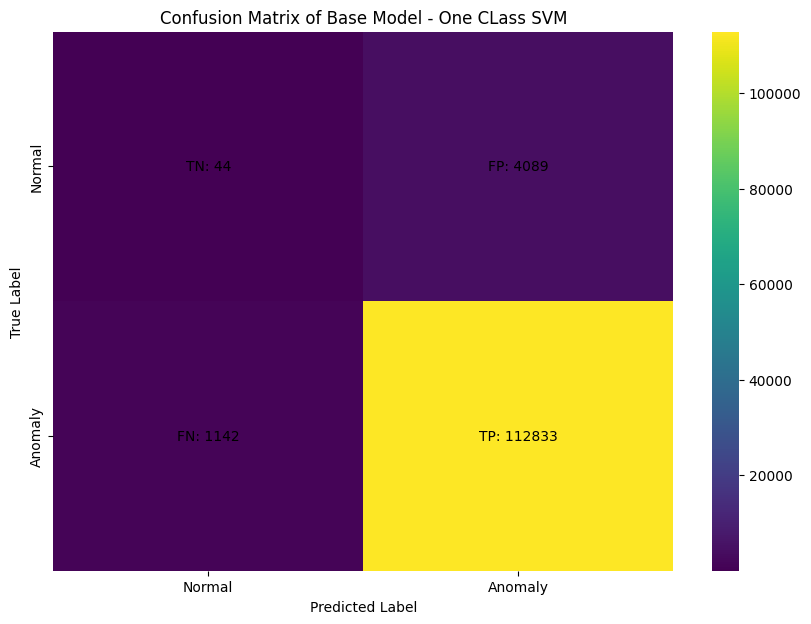

In [7]:
eval.plot_cm(bm_cm, 'Base Model - One CLass SVM')

### Classification Report

In [8]:
# Print the classification report
print(classification_report(y_val, bm_pred))

              precision    recall  f1-score   support

          -1       0.04      0.01      0.02      4133
           1       0.97      0.99      0.98    113975

    accuracy                           0.96    118108
   macro avg       0.50      0.50      0.50    118108
weighted avg       0.93      0.96      0.94    118108



### Metrics

In [9]:
bm_metrics = eval.get_metrics(y_val, bm_pred)
eval.print_metrics(bm_metrics, 'Base Model - One CLass SVM')

Metrics of Base Model - One CLass SVM:

Recall: 0.9899802588286905
Precision: 0.9650279673628573
F1 Score: 0.9773448767199228
PR AUC: 0.9650277533087438




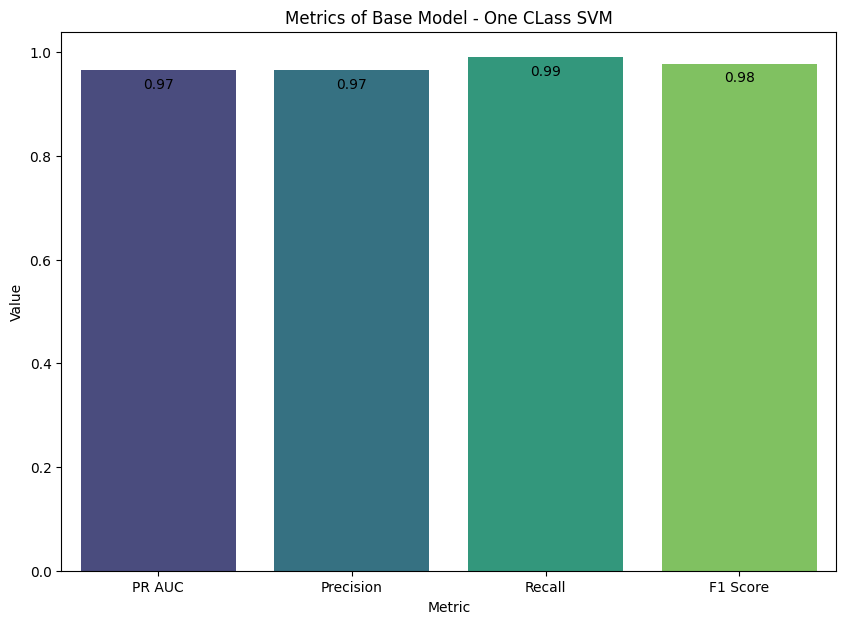

In [10]:
eval.plot_metrics(bm_metrics, 'Base Model - One CLass SVM')

## Outlier Analysis

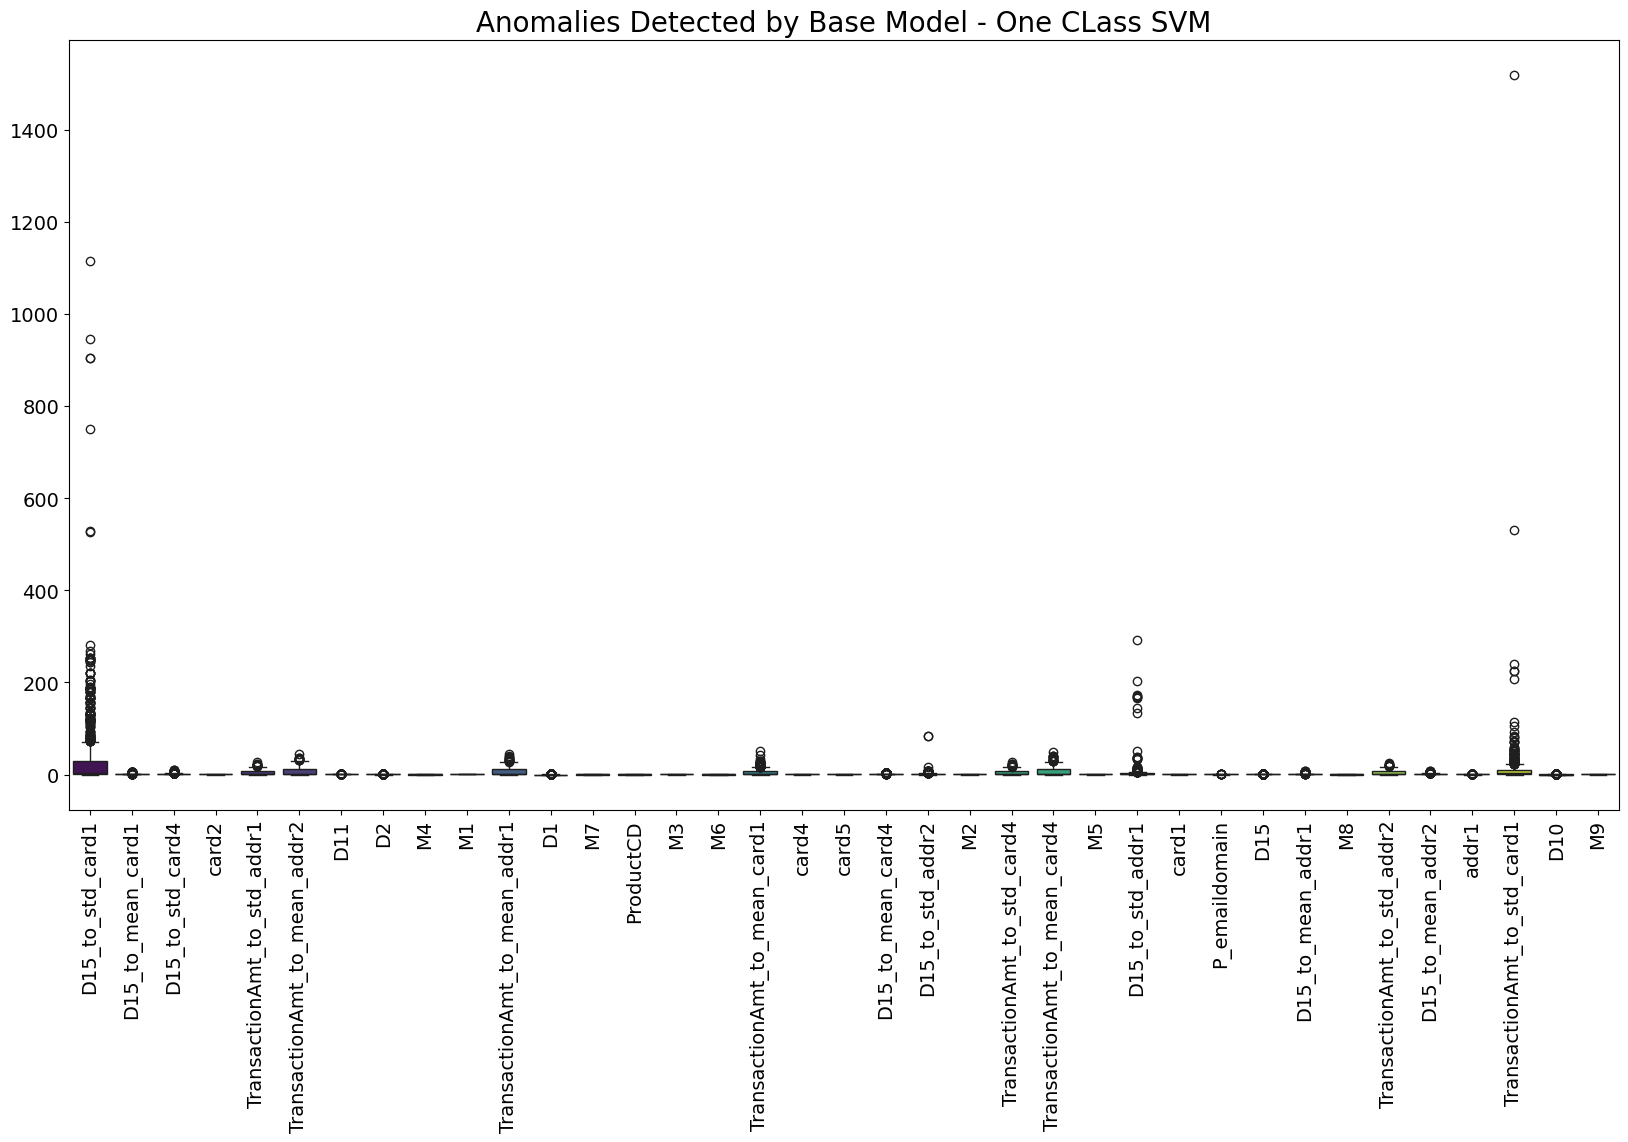

In [11]:
# Get the anomalies
bm_anomalies = X_val_df[bm_pred == -1]

# Boxplot of the anomalies
eval.plot_anomalies(bm_anomalies, 'Base Model - One CLass SVM')

# Tuned Model - GridSearch on Hyperparameters

m

In [12]:
# Define the parameter grid
tm_best_params = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'nu': [0.01, 0.1, 0.2],
    'gamma': ['scale']
}

# Fine tune the model
tm_best_params, tm_best_estimator, tm_metrics = mod.ocsvm_hypertune(tm_best_params, X_train, y_train)

# Use the best estimator to make predictions
tm_pred = tm_best_estimator.predict(X_val)

Best parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}
Best recall: 0.9899744408759219


## Evaluation

### Confusion Matrix

In [13]:
tm_cm = eval.get_cm(tm_pred, y_val)
eval.cm_inf(tm_cm, 'Tuned Model - One CLass SVM')

Confusion Matrix for model Tuned Model - One CLass SVM:

True Positives: 112833
True Negatives: 44
False Positives: 4089
False Negatives: 1142




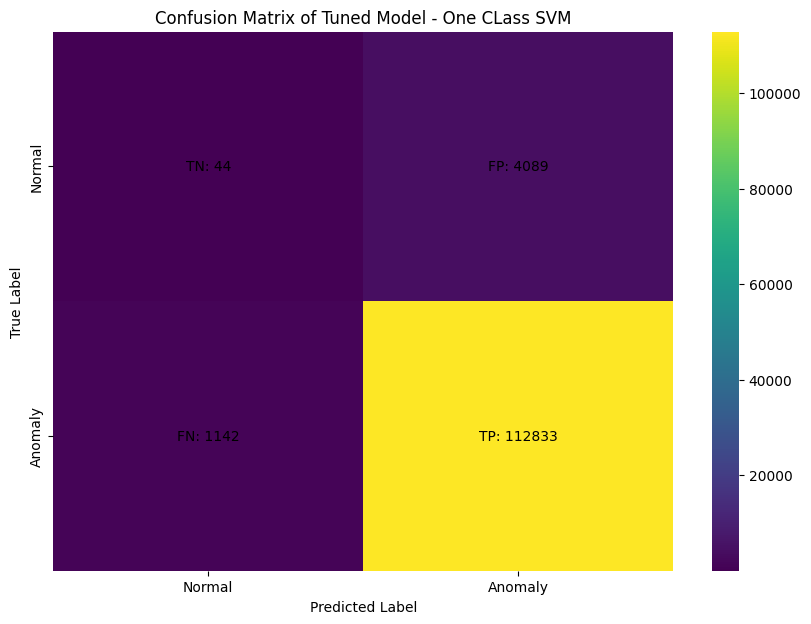

In [14]:
eval.plot_cm(tm_cm, 'Tuned Model - One CLass SVM')

### Classification Report

In [15]:
# Print the classification report
print(classification_report(y_val, tm_pred))

              precision    recall  f1-score   support

          -1       0.04      0.01      0.02      4133
           1       0.97      0.99      0.98    113975

    accuracy                           0.96    118108
   macro avg       0.50      0.50      0.50    118108
weighted avg       0.93      0.96      0.94    118108



### Metrics

In [16]:
tm_metrics = eval.get_metrics(y_val, tm_pred)
eval.print_metrics(tm_metrics, 'Tuned Model - One CLass SVM')

Metrics of Tuned Model - One CLass SVM:

Recall: 0.9899802588286905
Precision: 0.9650279673628573
F1 Score: 0.9773448767199228
PR AUC: 0.9650277533087438




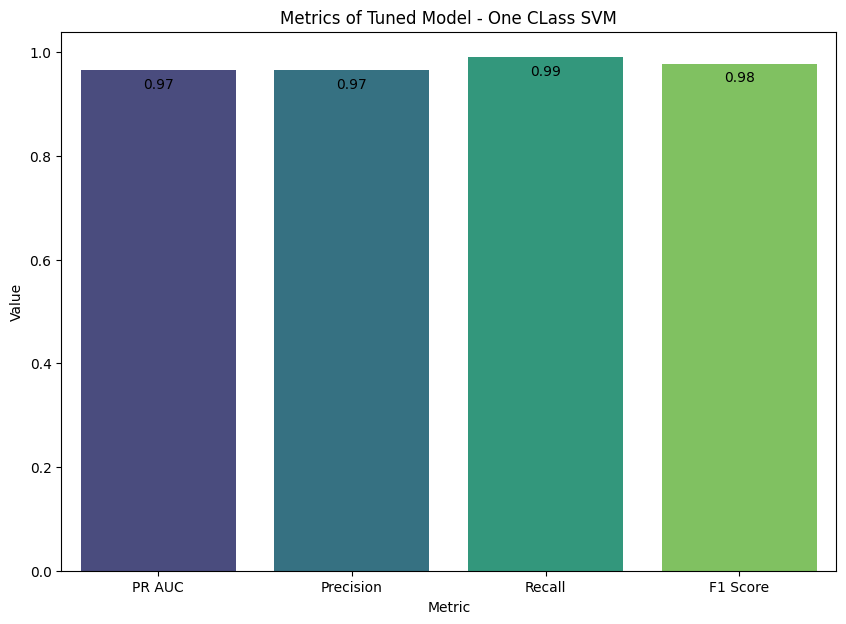

In [17]:
eval.plot_metrics(tm_metrics, 'Tuned Model - One CLass SVM')

## Outlier Analysis

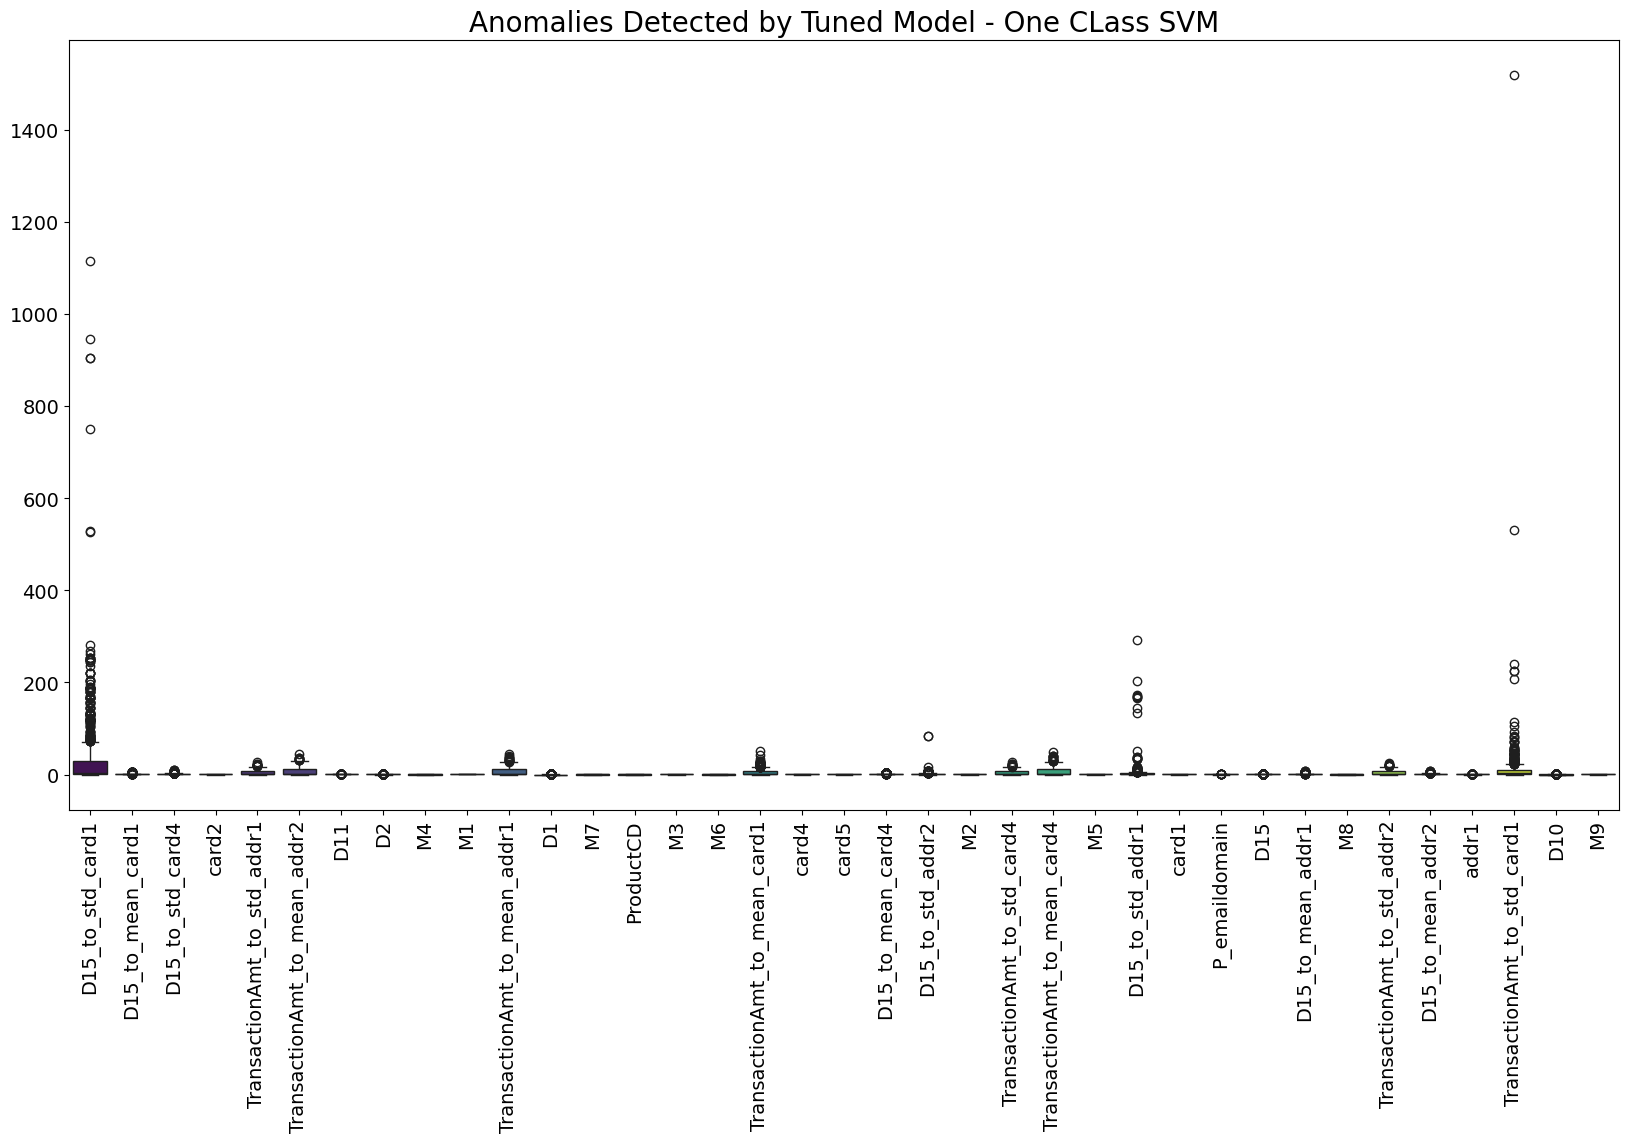

In [18]:
# Get the anomalies
tm_anomalies = X_val_df[tm_pred == -1]

# Boxplot of the anomalies
eval.plot_anomalies(tm_anomalies, 'Tuned Model - One CLass SVM')